# Statistical Data Visualization (Seaborn) - Other Useful Plots

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pdb

## More Seaborn Plots

In [ ]:
# Dataset

penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")

penguins.head()
# tips.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Pairplot

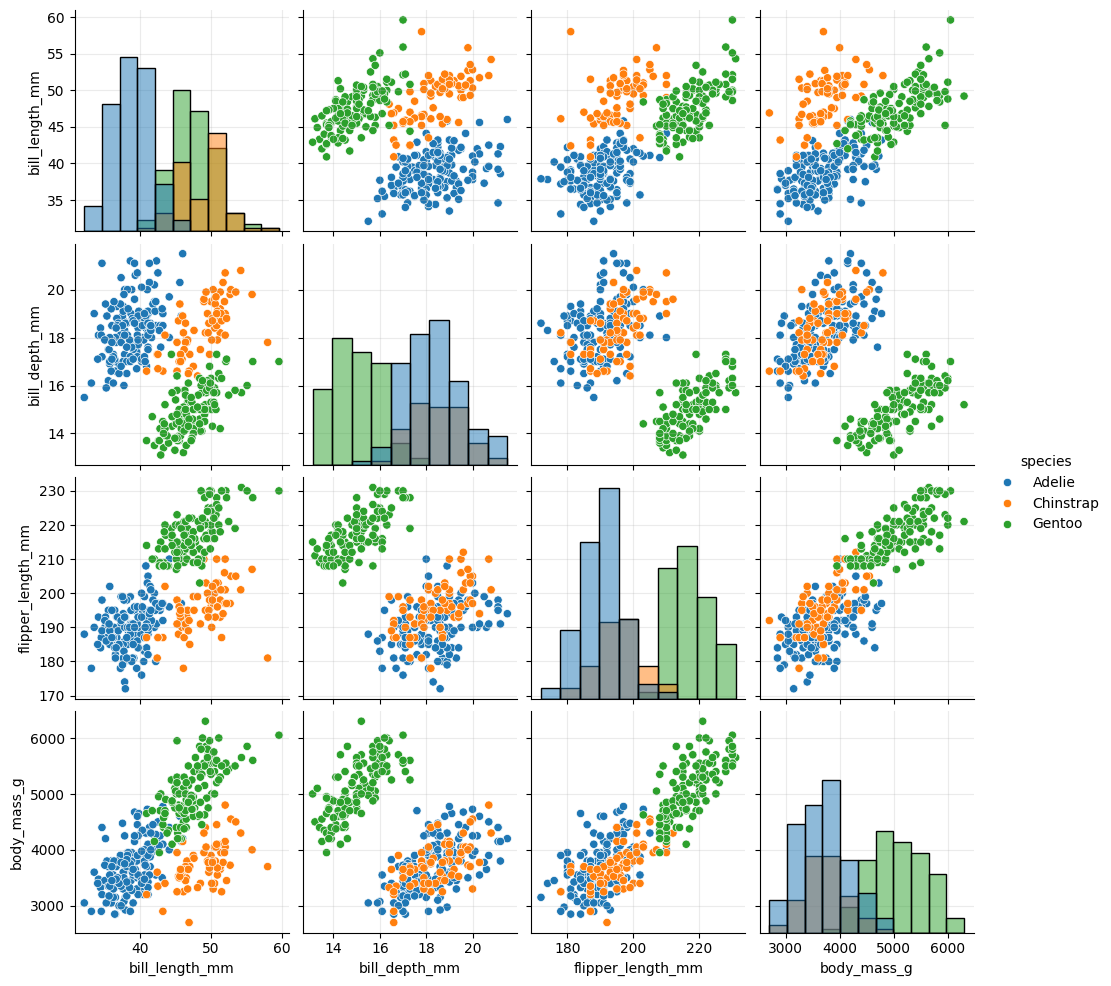

In [ ]:
# pairplot() or scatter matrix in plt

g = sns.pairplot(penguins, hue = 'species', diag_kind = 'hist')

# Add gridlines to each subplot
for ax in g.axes.flat:

    ax.grid(True, alpha = 0.25)  # Enable the grid

# diag_kind ('kde', 'hist')

## Joint Plot

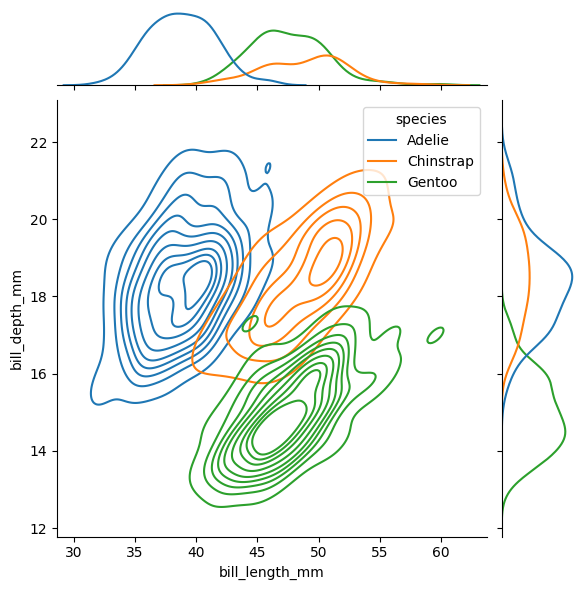

In [ ]:
# Show the joint distribution using kernel density estimation

g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue = 'species',
    kind="kde"
)

# kind (kde, scatter, hist, hex, reg, resid)

# reg cannot be used with hue
# hex cannot be used wit hue
# resid cannot be used with hue,

# Noted: resid or residuals of a linear regression model,
# represents the different between observed values and the predicted values

## Heatmap

In [ ]:
# Load the Iris dataset

from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Compute the correlation matrix

correlation_matrix = iris_df.corr()
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


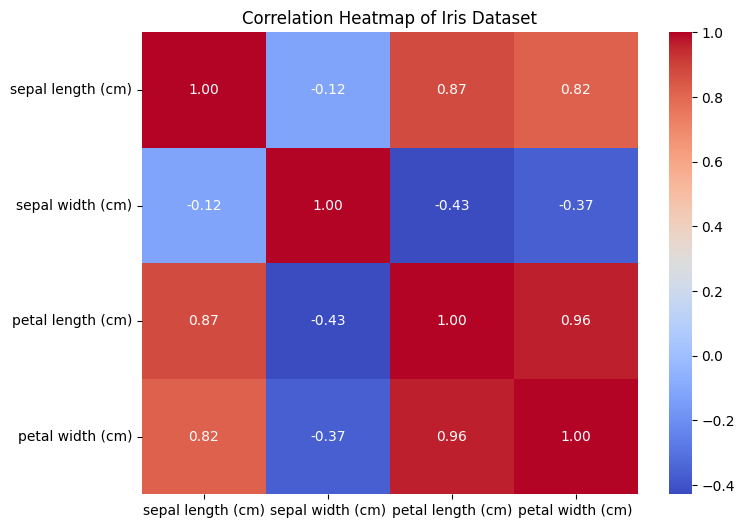

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

# Correlation Matrix: It shows the pairwise correlation between features. Values range from -1 to 1:
#  1: Perfect positive correlation.
# -1: Perfect negative correlation.
#  0: No correlation.

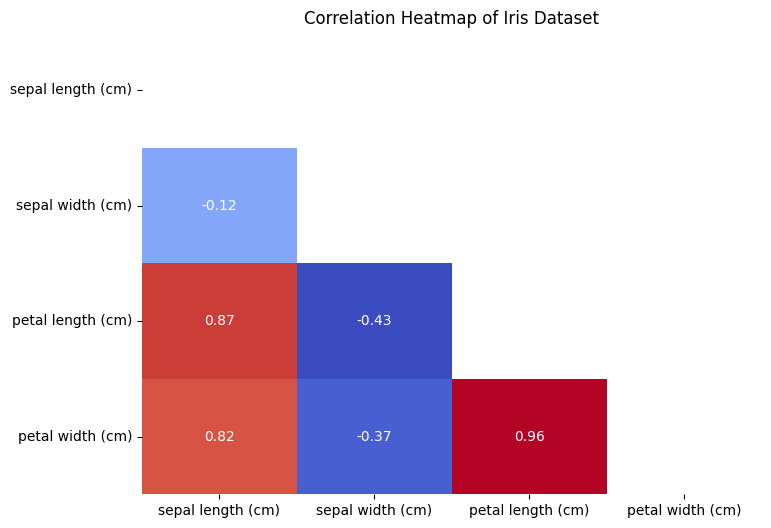

In [ ]:
# Plot the heatmap with mask
plt.figure(figsize=(8, 6))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask = mask, cbar = False)

plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

# Correlation Matrix: It shows the pairwise correlation between features. Values range from -1 to 1:
#  1: Perfect positive correlation.
# -1: Perfect negative correlation.
#  0: No correlation.

## Pair Grid

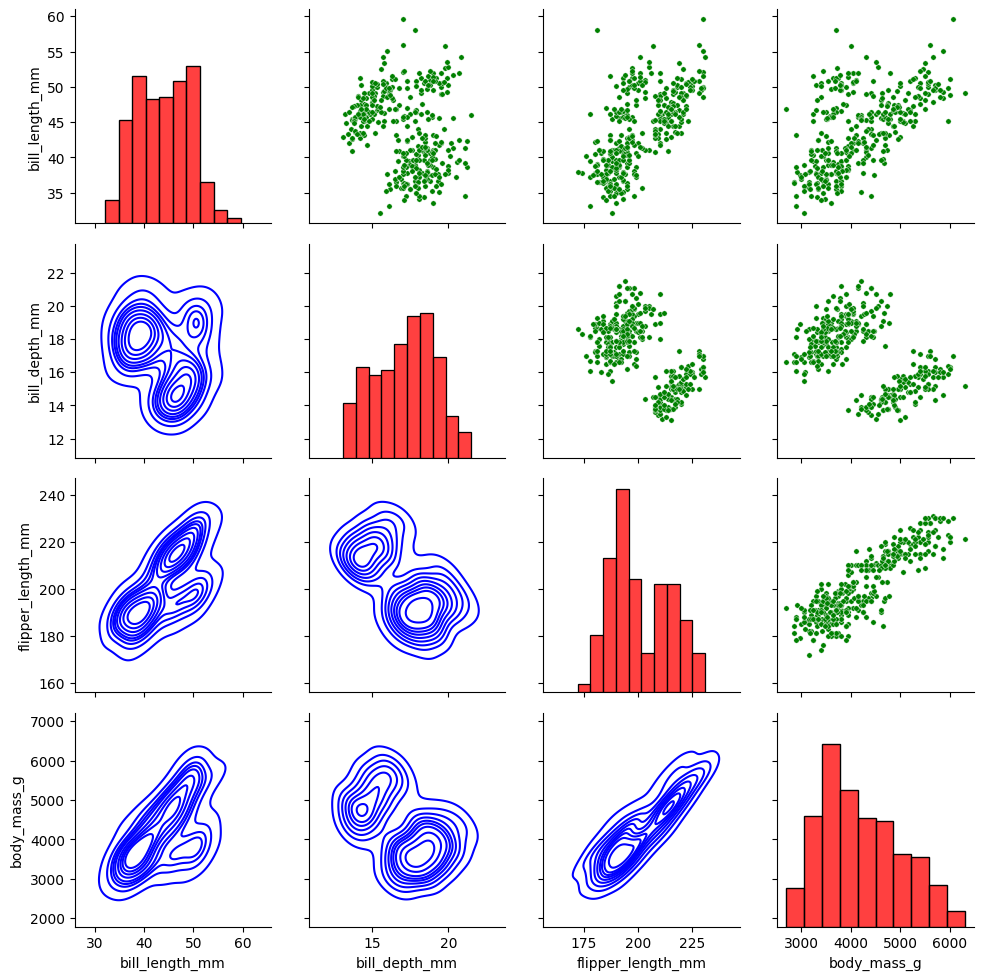

In [ ]:
g = sns.PairGrid(penguins)

g.map_upper(sns.scatterplot, s =15, color = 'green')
g.map_lower(sns.kdeplot, color = 'blue')
g.map_diag(sns.histplot, bins = 10, color = 'red')

## Linear Model Plot

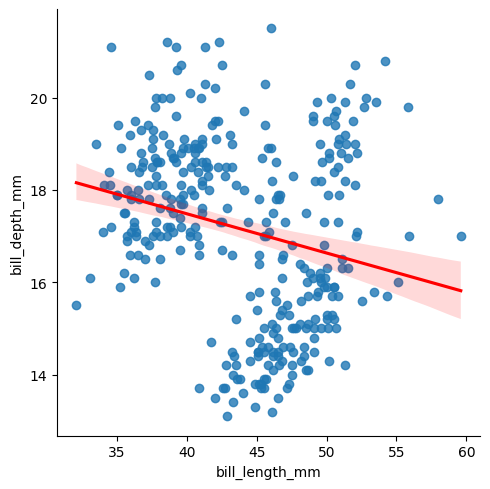

In [ ]:
# Simple
# Plot sepal width as a function of sepal_length across days

g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    height = 5,
    line_kws = {'color': 'red'}
)


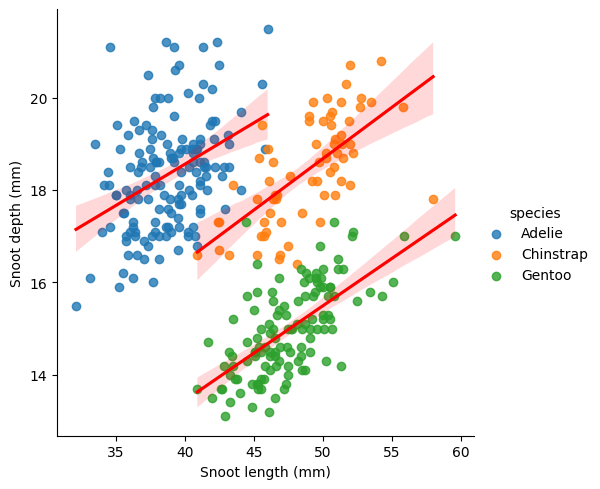

In [ ]:
# Multiple Lines

g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5,
    line_kws = {'color': 'red'}
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

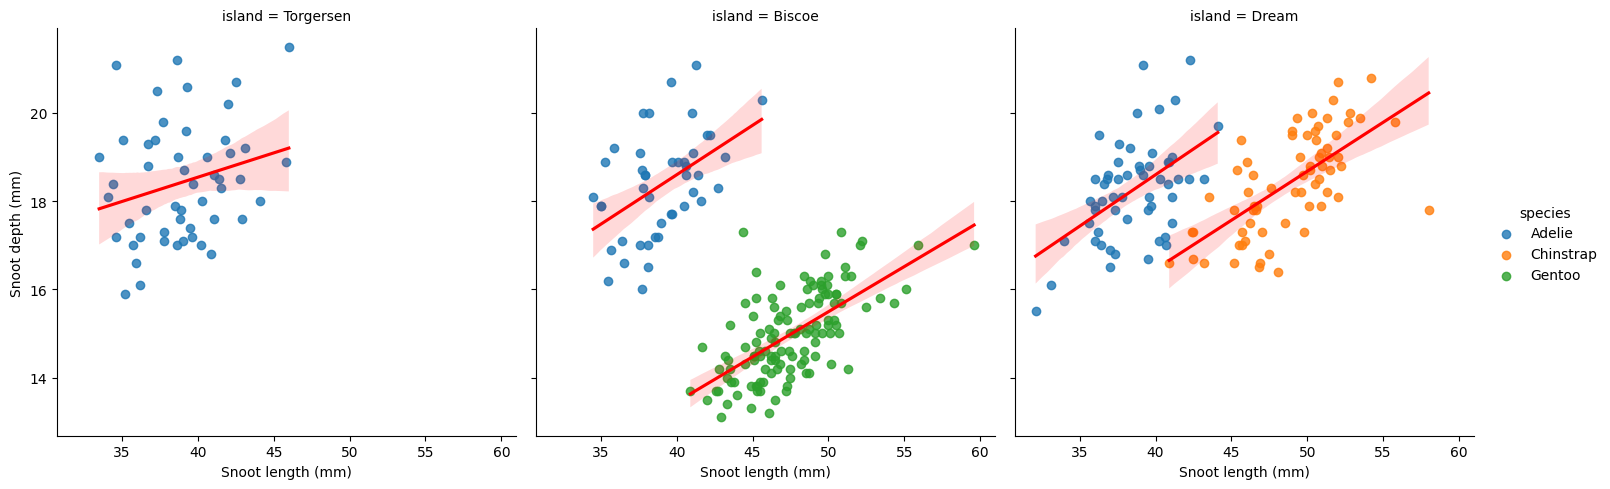

In [ ]:
# Multiple Lines with col

g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species", col = 'island',
    height=5,
    line_kws = {'color': 'red'}
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")